In [1]:
import snowflake.connector
import pandas as pd


# Bringing in data from snowflake 

In [2]:
# connecting to snowflake

snowflake_connection = snowflake.connector.connect(
    user="mihir13",
    password="Snowflake@136",
    account="xumrpiu-em89221",
    warehouse="COMPUTE_WH",
    database="DATA_SHIP",
    schema="PUBLIC_MART",
    role = "ACCOUNTADMIN"
)

In [3]:
# Execute SQL query to fetch the data
data = snowflake_connection.cursor().execute("SELECT * FROM ETMSDATA").fetchall()


In [4]:
# convert the decimal values to float for compatibility
data = [(x[:-1] + (float(x[-1]),)) for x in data]

In [5]:
# creating a data frame
df = pd.DataFrame(data, columns=['Domain', 'Topic', 'Trainee_Type', 'Plan_Type', 'Mode', 'Level', 'Duration'])

In [6]:
df

,Domain,Topic,Trainee_Type,Plan_Type,Mode,Level,Duration
0,Blockchain,Blockchain Basics,employee,training,online,advanced,0.5
1,Cybersecurity,Security Auditing,employee,training,online,intermediate,2.0
2,Cloud Computing,AWS Services,employee,training,online,advanced,0.5
3,Cloud Computing,DevOps in Cloud,employee,training,online,advanced,0.5
4,Data Analytics,Data Cleaning,intern,training,on-premise,beginner,0.5
...,...,...,...,...,...,...,...
489,Cybersecurity,Security Auditing,employee,training,on-premise,intermediate,2.0
490,Android Development,Java Basics,intern,training,online,intermediate,2.0
491,Web Development,CSS,intern,training,online,advanced,1.0
492,Data Analytics,Data Exploration,intern,training,online,intermediate,2.0


# Analysing & Preprocessing data

In [7]:
# mainipulating the Mode field 
df['Mode'] = df['Mode'].replace('on-premise', 'offline')

In [8]:
df

,Domain,Topic,Trainee_Type,Plan_Type,Mode,Level,Duration
0,Blockchain,Blockchain Basics,employee,training,online,advanced,0.5
1,Cybersecurity,Security Auditing,employee,training,online,intermediate,2.0
2,Cloud Computing,AWS Services,employee,training,online,advanced,0.5
3,Cloud Computing,DevOps in Cloud,employee,training,online,advanced,0.5
4,Data Analytics,Data Cleaning,intern,training,offline,beginner,0.5
...,...,...,...,...,...,...,...
489,Cybersecurity,Security Auditing,employee,training,offline,intermediate,2.0
490,Android Development,Java Basics,intern,training,online,intermediate,2.0
491,Web Development,CSS,intern,training,online,advanced,1.0
492,Data Analytics,Data Exploration,intern,training,online,intermediate,2.0


In [9]:
# making all the durations 10 since the duration values are very unevenly distributed w.r.t. to the other attributes
df['Duration'] = 1

In [10]:
df

,Domain,Topic,Trainee_Type,Plan_Type,Mode,Level,Duration
0,Blockchain,Blockchain Basics,employee,training,online,advanced,1
1,Cybersecurity,Security Auditing,employee,training,online,intermediate,1
2,Cloud Computing,AWS Services,employee,training,online,advanced,1
3,Cloud Computing,DevOps in Cloud,employee,training,online,advanced,1
4,Data Analytics,Data Cleaning,intern,training,offline,beginner,1
...,...,...,...,...,...,...,...
489,Cybersecurity,Security Auditing,employee,training,offline,intermediate,1
490,Android Development,Java Basics,intern,training,online,intermediate,1
491,Web Development,CSS,intern,training,online,advanced,1
492,Data Analytics,Data Exploration,intern,training,online,intermediate,1


In [11]:
# since the data is not enough, we will insert more 1006 rows
from random import choice, randint

In [12]:
# Arrays for domains
domain_names = ["Software Architecture", "Machine Learning", "Blockchain", "Cloud Computing", "Cybersecurity", "Android Development", "Web Development", "DevOps", "Data Engineering", "Data Analytics", "Data Science"]

In [13]:
# Dictionary for topics based on domain and trainee type
topic_names = {
    "Software Architecture": ["Design Patterns", "Software Design Principles", "Microservices", "Architectural Styles"],
    "Machine Learning": ["Supervised Learning", "Unsupervised Learning", "Deep Learning", "Reinforcement Learning"],
    "Blockchain": ["Blockchain Basics", "Smart Contracts", "Consensus Mechanisms", "Decentralized Applications"],
    "Cloud Computing": ["AWS Services", "Azure Services", "Google Cloud Services", "DevOps in Cloud"],
    "Cybersecurity": ["Network Security", "Cryptography", "Ethical Hacking", "Security Auditing"],
    "Android Development": ["Java Basics", "Android UI Design", "Networking in Android", "Firebase Integration"],
    "Web Development": ["HTML", "CSS", "JavaScript", "React.js"],
    "DevOps": ["Continuous Integration", "Continuous Deployment", "Docker", "Kubernetes"],
    "Data Engineering": ["Data Warehousing", "ETL Processes", "Big Data Technologies", "Data Modeling"],
    "Data Analytics": ["Data Visualization", "Data Exploration", "Statistical Analysis", "Data Cleaning"],
    "Data Science": ["Machine Learning", "Data Mining", "Predictive Modeling", "Natural Language Processing"]
}


In [14]:
# adding data to the data frame
for _ in range(1006):
    trainee_type = choice(['employee', 'intern'])
    domain = choice(domain_names)
    topic = choice(topic_names[domain])

    plan_type = 'training'
    mode = choice(['online', 'offline'])
    level = choice(['beginner', 'intermediate', 'advanced'])
    duration = 1

    df.loc[len(df.index)] = [domain, topic, trainee_type, plan_type, mode, level, duration]  


In [15]:
df

,Domain,Topic,Trainee_Type,Plan_Type,Mode,Level,Duration
0,Blockchain,Blockchain Basics,employee,training,online,advanced,1
1,Cybersecurity,Security Auditing,employee,training,online,intermediate,1
2,Cloud Computing,AWS Services,employee,training,online,advanced,1
3,Cloud Computing,DevOps in Cloud,employee,training,online,advanced,1
4,Data Analytics,Data Cleaning,intern,training,offline,beginner,1
...,...,...,...,...,...,...,...
1495,Cybersecurity,Security Auditing,employee,training,offline,advanced,1
1496,Data Science,Natural Language Processing,employee,training,offline,intermediate,1
1497,Software Architecture,Software Design Principles,intern,training,offline,advanced,1
1498,Data Science,Predictive Modeling,intern,training,offline,beginner,1


In [16]:
# adjusitng the duration as per other attributes

# Weight dictionary for domain
domain_weights = {
    "Software Architecture": 1.5,
    "Machine Learning": 2,
    "Blockchain": 1.8,
    "Cloud Computing": 2,
    "Cybersecurity": 1.4,
    "Android Development": 2.5,
    "Web Development": 2.2,
    "DevOps": 1.6,
    "Data Engineering": 2.1,
    "Data Analytics": 1.2,
    "Data Science": 1.9
}

# Weight dictionary for trainee_type
trainee_type_weights = {
    "employee": 0.5,
    "intern": 1
}

# Weight dictionary for mode
mode_weights = {
    "online": 1,
    "offline": 1.5
}

# Weight dictionary for level
level_weights = {
    "beginner": 1.0,
    "intermediate": 1.7,
    "advanced": 2.1
}


In [17]:
for index, row in df.iterrows():
    weight = domain_weights.get(row['Domain'], 1) * trainee_type_weights.get(row['Trainee_Type'], 1) * mode_weights.get(row['Mode'], 1) * level_weights.get(row['Level'], 1)
    df.at[index, 'Duration'] = weight

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21500\3376203919.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.8900000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Duration'] = weight


In [18]:
df.head(100)

,Domain,Topic,Trainee_Type,Plan_Type,Mode,Level,Duration
0,Blockchain,Blockchain Basics,employee,training,online,advanced,1.89
1,Cybersecurity,Security Auditing,employee,training,online,intermediate,1.19
2,Cloud Computing,AWS Services,employee,training,online,advanced,2.10
3,Cloud Computing,DevOps in Cloud,employee,training,online,advanced,2.10
4,Data Analytics,Data Cleaning,intern,training,offline,beginner,1.80
...,...,...,...,...,...,...,...
95,Web Development,CSS,intern,training,online,beginner,2.20
96,DevOps,Docker,intern,training,offline,intermediate,4.08
97,Cybersecurity,Cryptography,employee,training,online,beginner,0.70
98,Cloud Computing,Google Cloud Services,employee,training,offline,intermediate,2.55


# EDA

In [19]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

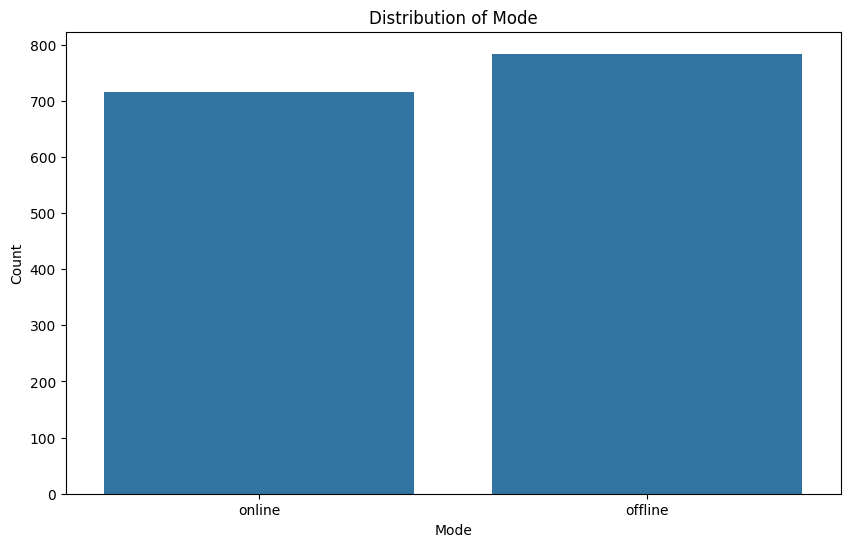

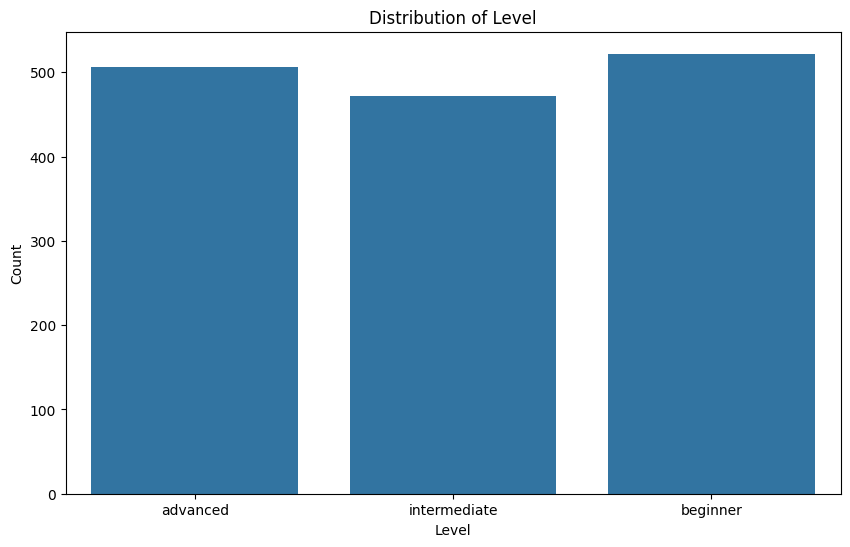

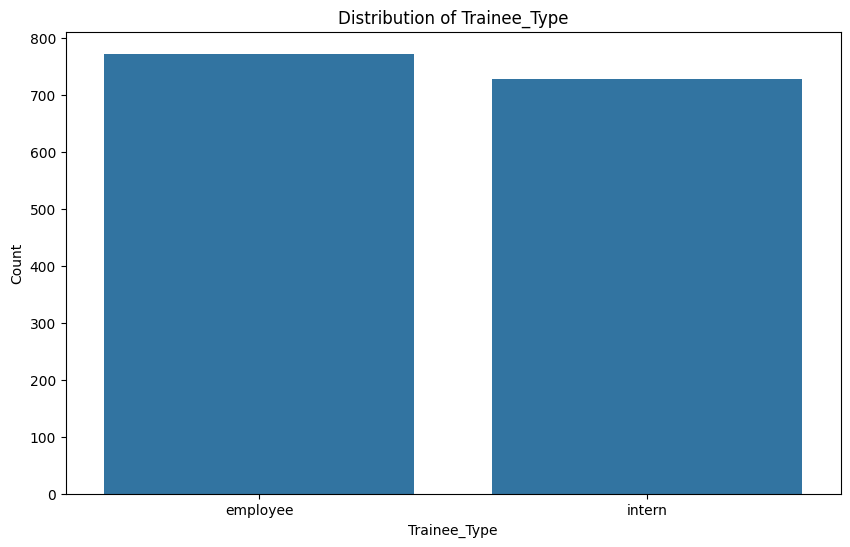

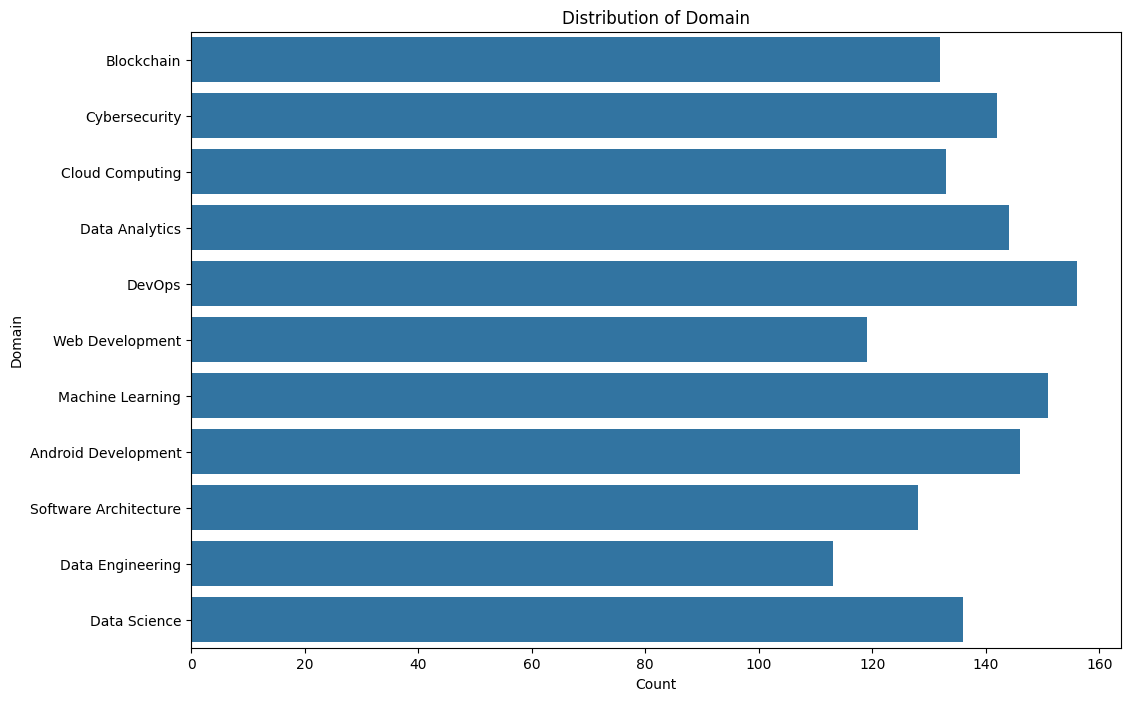

In [20]:
# Visualize the distribution of Mode
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode')
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Level')
plt.title('Distribution of Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Trainee_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Trainee_Type')
plt.title('Distribution of Trainee_Type')
plt.xlabel('Trainee_Type')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Domain
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Domain')
plt.title('Distribution of Domain')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()

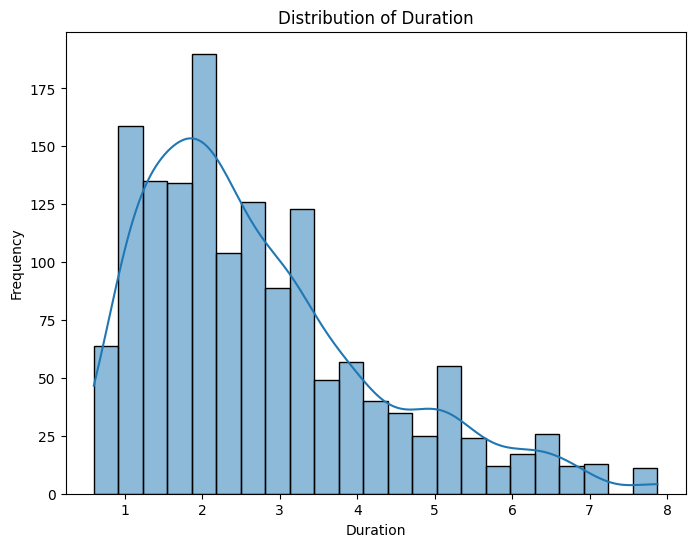

In [21]:
# distribution of the target variable

plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [22]:

encoding_map = {}


In [23]:
for column in ['Domain', 'Trainee_Type', 'Mode', 'Level']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column and store the encoded values
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    
    # Store the mapping of actual values to encoded values in the dictionary
    encoding_map[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [24]:
encoding_map

{'Domain': {'Android Development': 0,
  'Blockchain': 1,
  'Cloud Computing': 2,
  'Cybersecurity': 3,
  'Data Analytics': 4,
  'Data Engineering': 5,
  'Data Science': 6,
  'DevOps': 7,
  'Machine Learning': 8,
  'Software Architecture': 9,
  'Web Development': 10},
 'Trainee_Type': {'employee': 0, 'intern': 1},
 'Mode': {'offline': 0, 'online': 1},
 'Level': {'advanced': 0, 'beginner': 1, 'intermediate': 2}}

In [25]:
# copy of the original df - for correlational purposes
# removing the attributes Topic and Plan_Type
encoded_df = df[['Domain_encoded','Level_encoded','Mode_encoded', 'Trainee_Type_encoded',  'Duration']].copy()
encoded_df

,Domain_encoded,Level_encoded,Mode_encoded,Trainee_Type_encoded,Duration
0,1,0,1,0,1.8900
1,3,2,1,0,1.1900
2,2,0,1,0,2.1000
3,2,0,1,0,2.1000
4,4,1,0,1,1.8000
...,...,...,...,...,...
1495,3,0,0,0,2.2050
1496,6,2,0,0,2.4225
1497,9,0,0,1,4.7250
1498,6,1,0,1,2.8500


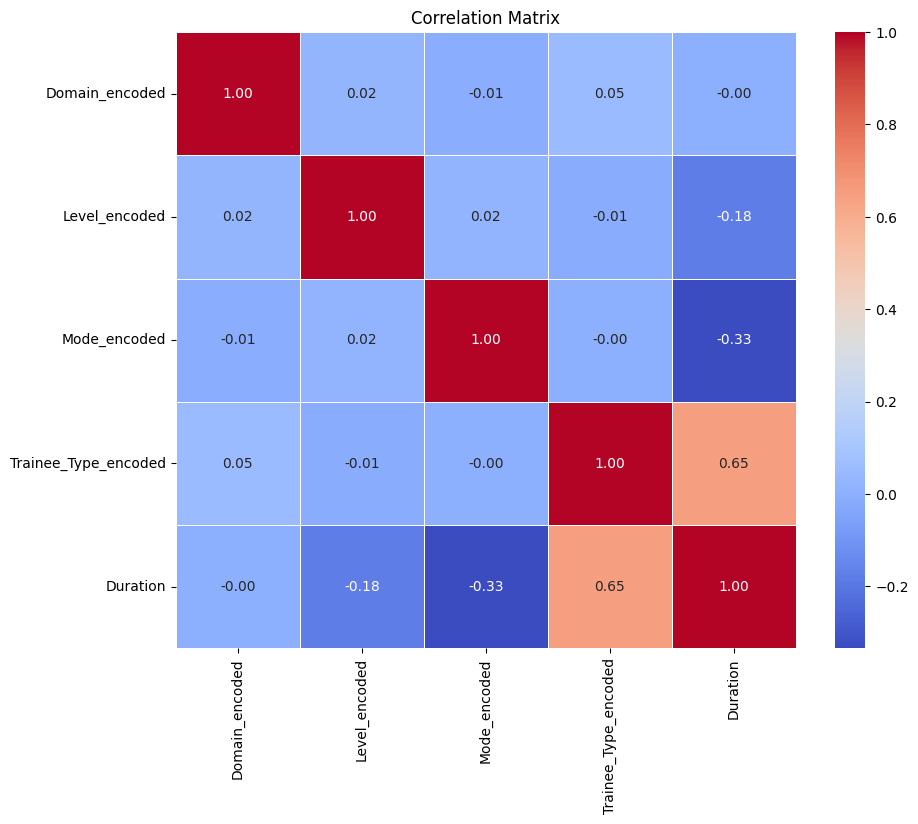

In [26]:
# correlation analysis
# Compute the correlation matrix
correlation_matrix = encoded_df.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


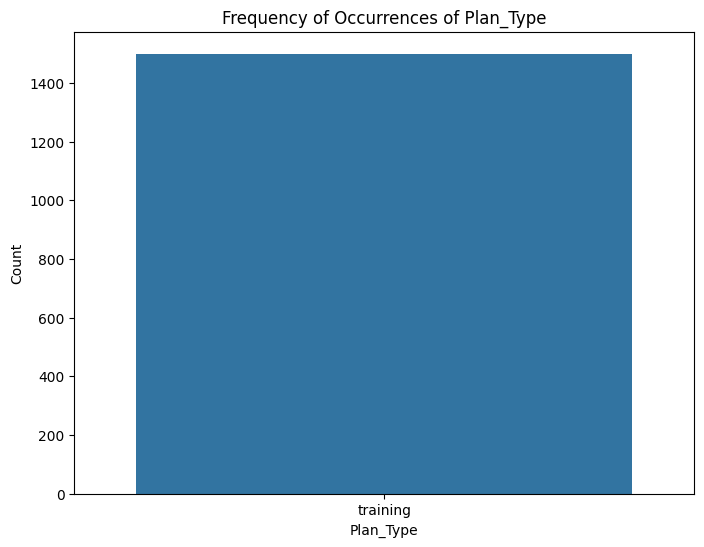

In [27]:

# Visualize the frequency of occurrences of the single value in the Plan_Type column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Plan_Type')
plt.title('Frequency of Occurrences of Plan_Type')
plt.xlabel('Plan_Type')
plt.ylabel('Count')
plt.show()


## Model selection

In [28]:
encoded_df

,Domain_encoded,Level_encoded,Mode_encoded,Trainee_Type_encoded,Duration
0,1,0,1,0,1.8900
1,3,2,1,0,1.1900
2,2,0,1,0,2.1000
3,2,0,1,0,2.1000
4,4,1,0,1,1.8000
...,...,...,...,...,...
1495,3,0,0,0,2.2050
1496,6,2,0,0,2.4225
1497,9,0,0,1,4.7250
1498,6,1,0,1,2.8500


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your data is stored in a DataFrame named 'encoded_df'
# Separate features (X) and target variable (y)
X = encoded_df.drop(columns=['Duration'])
y = encoded_df['Duration']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(),
    'Linear SVR': LinearSVR(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),  # Replaced one model with AdaBoostRegressor
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Train and test models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Squared Error (MSE)': mse,
                     'Mean Absolute Error (MAE)': mae,
                     'R^2 Score': r2}

# Display results
for name, metrics in results.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for Linear Regression:
Mean Squared Error (MSE): 1.2266711070945069
Mean Absolute Error (MAE): 0.9111473138929942
R^2 Score: 0.512468480190872

Results for Ridge Regression:
Mean Squared Error (MSE): 1.2268701321788928
Mean Absolute Error (MAE): 0.9112418019353561
R^2 Score: 0.5123893791169902

Results for Lasso Regression:
Mean Squared Error (MSE): 2.516286852573785
Mean Absolute Error (MAE): 1.2703611666666665
R^2 Score: -7.992885456475918e-05

Results for Elastic Net:
Mean Squared Error (MSE): 2.516286852573785
Mean Absolute Error (MAE): 1.2703611666666665
R^2 Score: -7.992885456475918e-05

Results for SVR:
Mean Squared Error (MSE): 0.6191940586155756
Mean Absolute Error (MAE): 0.5569223561725128
R^2 Score: 0.753905819817784

Results for Linear SVR:
Mean Squared Error (MSE): 1.3021789491637237
Mean Absolute Error (MAE): 0.916563647134548
R^2 Score: 0.4824584369212406

Results for Random Forest Regression:
Mean Squared Error (MSE): 0.019147767677083323
Mean Absolute Error (MA

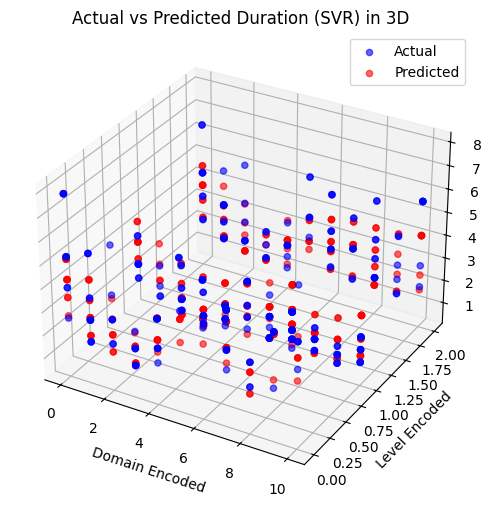

Mean Squared Error (MSE): 0.6191940586155756
Mean Absolute Error (MAE): 0.5569223561725128
R^2 Score: 0.753905819817784


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your data is stored in a DataFrame named 'df'
# Separate features (X) and target variable (y)
X = encoded_df.drop(columns=['Duration'])
y = encoded_df['Duration']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR model
svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR

# Train SVR model
svr.fit(X_train, y_train)

# Predict on the testing set
y_pred = svr.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the performance in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, color='blue', label='Actual', alpha=0.6)

# Plotting predicted values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='red', label='Predicted', alpha=0.6)

ax.set_xlabel('Domain Encoded')
ax.set_ylabel('Level Encoded')
ax.set_zlabel('Duration')
ax.set_title('Actual vs Predicted Duration (SVR) in 3D')
ax.legend()
plt.show()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


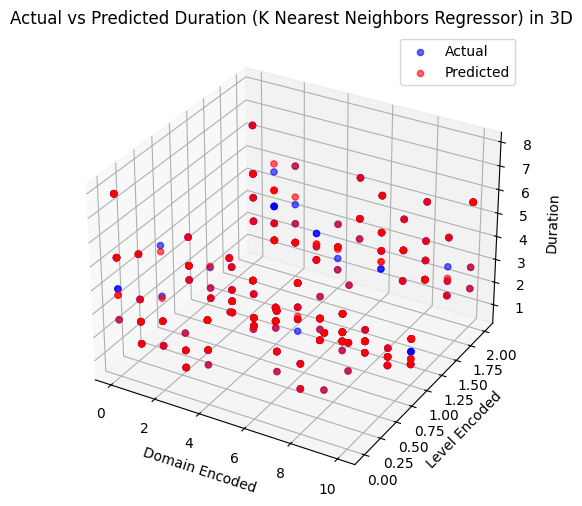

Mean Squared Error (MSE): 0.014675321666666664
Mean Absolute Error (MAE): 0.029650000000000027
R^2 Score: 0.9941674000190773


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # Importing K Nearest Neighbors Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your data is stored in a DataFrame named 'encoded_df'
# Separate features (X) and target variable (y)
X = encoded_df.drop(columns=['Duration'])
y = encoded_df['Duration']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize K Nearest Neighbors Regressor model
knn_regressor = KNeighborsRegressor()

# Train K Nearest Neighbors Regressor model
knn_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the performance in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, color='blue', label='Actual', alpha=0.6)

# Plotting predicted values
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='red', label='Predicted', alpha=0.6)

ax.set_xlabel('Domain Encoded')
ax.set_ylabel('Level Encoded')
ax.set_zlabel('Duration')
ax.set_title('Actual vs Predicted Duration (K Nearest Neighbors Regressor) in 3D')
ax.legend()
plt.show()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


In [32]:
import pandas as pd
from sklearn.svm import SVR

def predict_duration(input_data, encoded_map, svr_model):
    encoded_input = []
    for feature, value in input_data.items():
        encoded_value = encoded_map[feature][value]
        encoded_input.append(encoded_value)
    print(encoded_input)
    duration_prediction = svr_model.predict([encoded_input])
    return duration_prediction[0]



In [33]:
# Example of how to use the function
input_data = {
    'Domain': 'Blockchain',
    'Level': 'advanced',
    'Mode': 'offline',
    'Trainee_Type': 'employee'
}

# Assuming 'encoded_map' contains the mapping for these values
# Assuming 'svr' contains the trained SVR model

duration_prediction = predict_duration(input_data, encoding_map, knn_regressor)
print("Predicted Duration:", duration_prediction)


[1, 0, 0, 0]
Predicted Duration: 2.8350000000000004


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## Creating pickle file 

In [36]:
import joblib

In [41]:
joblib.dump(knn_regressor, 'duration_prediction_model.pkl')

['duration_prediction_model.pkl']

In [42]:
model = joblib.load("duration_prediction_model.pkl")

In [43]:
model.predict([[1,0,1,0]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.89])